In [1]:
import control
import numpy
import matplotlib.pyplot as plt
import numpy as np

## Task 5

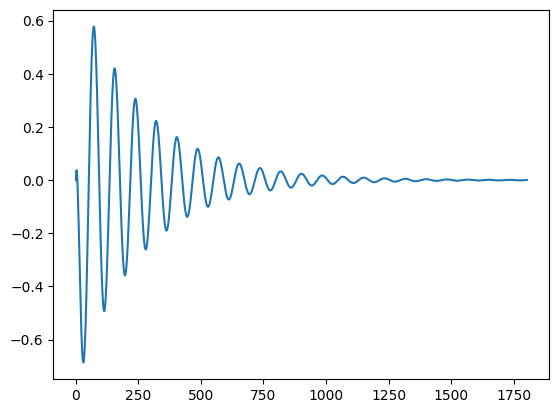

In [117]:
tf = control.tf([1, -5], [2, 5, 4, 8])
plt.plot(control.impulse_response(tf).outputs)

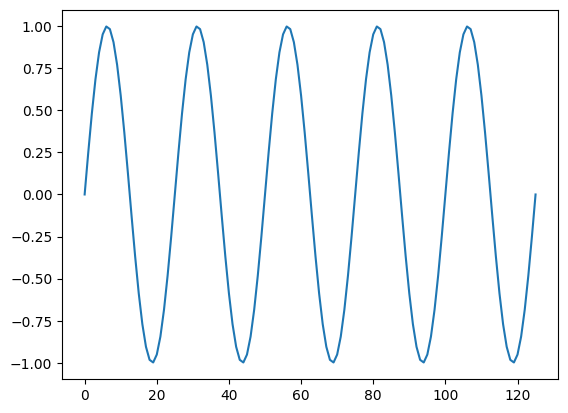

In [118]:
tf = control.tf([1], [1, 0, 1])
plt.plot(control.impulse_response(tf).outputs)

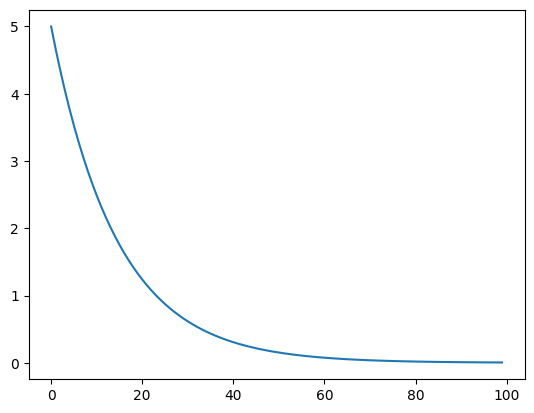

In [4]:
tf = control.tf([5], [1, 3])
plt.plot(control.impulse_response(tf).outputs)

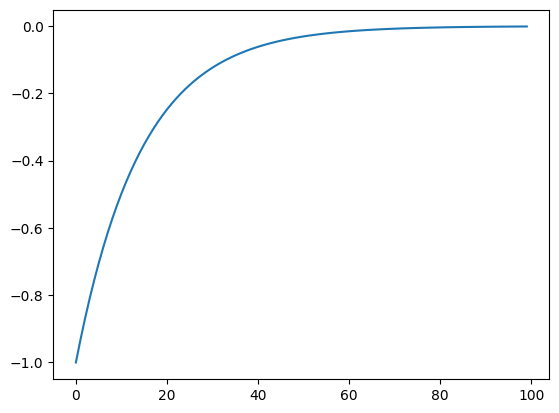

In [5]:
tf = control.tf([1], [-1, -1])
plt.plot(control.impulse_response(tf).outputs)

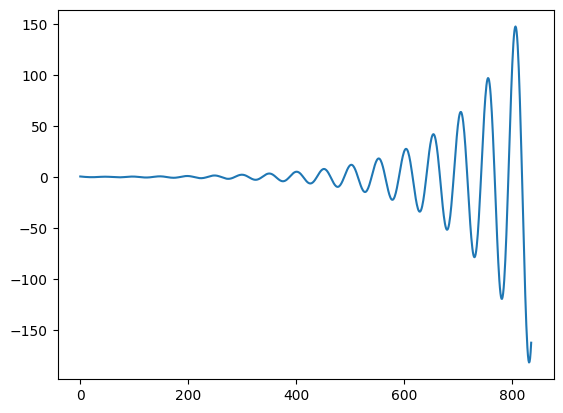

In [6]:
tf = control.tf([1, 0, 1], [2, 3, 4, 8])
plt.plot(control.impulse_response(tf).outputs)

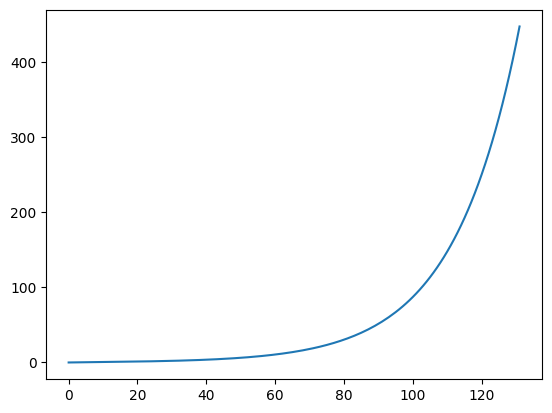

In [7]:
tf = control.tf([1], [1, 1, -1])
plt.plot(control.impulse_response(tf).outputs)

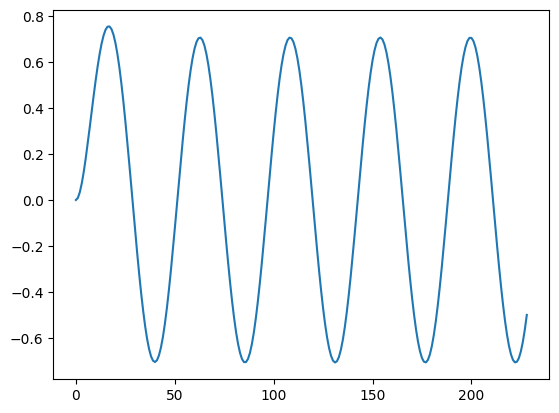

In [120]:
tf = control.tf([1], [1, 1, 1, 1])
plt.plot(control.impulse_response(tf).outputs)

## Task 6

In [139]:
A = [[0, 0], [-1, 0]]
np.linalg.eigvals(A)

array([0., 0.])

## Task 8

In [141]:
def check_controllability_eigens(A, B):
    A, B = np.array(A), np.array(B) 
    eig_vals = np.linalg.eigvals(A)
    print(f'Eigen values of A:')
    for val in eig_vals:
        print(f"   {np.array([val])}: {'controllable' if np.linalg.matrix_rank(np.hstack(((A - val * np.eye(A.shape[0])), B))) == A.shape[0] else 'not controllable'}")

In [142]:
check_controllability_eigens([[0, 1], [1, 1]], [[0], [1]])

Eigen values of A:
   [-0.61803399]: controllable
   [1.61803399]: controllable


In [143]:
check_controllability_eigens([[1, 0], [1, 1]], [[0], [1]])

Eigen values of A:
   [1.]: not controllable
   [1.]: not controllable


In [144]:
check_controllability_eigens([[-1, 0], [1, 1]], [[0], [1]])

Eigen values of A:
   [1.]: controllable
   [-1.]: not controllable


In [145]:
check_controllability_eigens([[1, 0], [1, -1]], [[0], [1]])


Eigen values of A:
   [-1.]: controllable
   [1.]: not controllable


In [ ]:
check_controllability_eigens([[1, 0], [1, -1]], [[1], [0]])


Eigen values of A:
   [-1.]: controllable
   [1.]: controllable


In [ ]:
check_controllability_eigens([[1, 0], [1, 1]], [[1], [0]])

Eigen values of A:
   [1.]: controllable
   [1.]: controllable


In [ ]:
check_controllability_eigens([[-1, 0], [1, 1]], [[1], [0]])

Eigen values of A:
   [1.]: controllable
   [-1.]: controllable


In [ ]:
check_controllability_eigens([[1, 1], [1, 1]], [[0], [1]])

Eigen values of A:
   [2.]: controllable
   [0.]: controllable


In [ ]:
check_controllability_eigens([[1, 1], [1, 1]], [[1], [1]])


Eigen values of A:
   [2.]: controllable
   [0.]: not controllable



p = sympy.Symbol("p")

In [ ]:
import sympy
p = sympy.Symbol("p")
for n in range(1, 11):
    poly = sympy.simplify((p + 1) ** n)
    coeffs = sympy.Poly(poly, p).all_coeffs()
    # print(f'Polynom: {poly} = {poly.expand()}; coeffs = {coeffs}')
    ss = control.tf2ss(control.tf([1]*n, np.array(coeffs, dtype=np.float64)))
    print(n, np.linalg.matrix_rank(control.ctrb(ss.A, ss.B)) == ss.A.shape[0], np.linalg.matrix_rank(control.obsv(ss.A, ss.C)) == ss.A.shape[0])

1 True True
2 True True
3 True True
4 True True
5 True True
6 True True
7 True True
8 True True
9 True True
10 True True


## Task 15

In [151]:
w_gx = control.tf([3, 2], [1])
w_gy = control.tf([1, 2], [3, 2]) * w_gx
w_gz = control.tf([1, 1], [3, 4]) * w_gy
w_gu = w_gx + w_gy + w_gz
w_gu

TransferFunction(array([117, 435, 586, 340,  72]), array([27, 72, 60, 16]))

In [152]:
72 / 16

4.5

## Task 19

In [153]:
import cvxpy
def task1_get_K(A, B, alpha):
    P = cvxpy.Variable(A.shape, PSD=True)
    Y = cvxpy.Variable((B.shape[1], B.shape[0]))
    lyapunov_lmi = P @ A.T + A @ P + 2 * alpha * P + Y.T @ B.T + B @ Y
    
    constraints = [P >> np.eye(2) , lyapunov_lmi << 0]
    objective = cvxpy.Minimize(0)
    
    prob = cvxpy.Problem(objective, constraints)
    try:
        print(f'Optimization error: {prob.solve(solver="CVXOPT")}')
        print(f'spec(P): {np.linalg.eigvals(P.value)}; P >> 0: {np.all(np.linalg.eigvals(P.value).real >= 0)}')
        print(f'spec(lmi): {np.linalg.eigvals(lyapunov_lmi.value)}; lyapunov_lmi <<= 0: {np.all(np.linalg.eigvals(lyapunov_lmi.value).real <= 0)}')
        # print(P.value)
    except Exception:
        return 0, False
    
    
    return True

In [218]:
tf = control.tf([1], [0.2, 1, 0])
A, B = control.tf2ss(tf).A, control.tf2ss(tf).B
task1_get_K(A, B, 507.4152)

Optimization error: inf


(0, False)

## Task 22

In [225]:
A = np.array([[0, 1], [-0.02, -3]])
B = [[0], [1]]
C = np.array([1, 0])
ss = control.ss(A, B, C, [0])
P = control.gram(ss, 'c')

In [226]:
np.sqrt(C @ P @ C.T)

2.8867513459480465